In [1]:
import os
from glob import glob

# The MNIST dataset

The MNIST dataset contains hand-drawn images of digits from 0 - 9. The digits were digitally drawn on a black canvas with white paint.

## Dataset structure

The [MNIST](https://www.kaggle.com/datasets/scolianni/mnistasjpg) dataset contains a `trainingSet` with the images and the corresponding label for each image. The `testSet` contains unlabeled images that we could run inference on.

# The image classifier

## The image classifier input & output

The image classifier will take in as input an image of a hand drawn image. Then it will analyze and give us a prediction on what it thinks the digit is.

## The image classifier architecture

The image classifier we are going to build is a Neural Network. Now the neural network will contain `linear layers` that will analyze the image and a `softmax layer` that will give us the prediction.

## Training the image classifer

To train our image classifier, we will need to feed our network images of the digits. The network will then give us a digit that it thinks the image represents. It is very likely that the network will answer wrong, because it hasn't learnt anything yet. To make it learn, we will punish it each time it makes a mistake and reward it each time it gives a correct answer. This punish and reward system will happen via a `loss function`.

# 1. Explore the dataset

In [2]:
# python variables are named using snake_case where a space ' ' is represented by an underscore '_'

# declaring a python variable with the = operator
ds_root = "./dataset/trainingSet/trainingSet" # the path to the dataset. The '.' represents the current folder this file is in

# the join function combines all the folders to create a path leading to the file
image_path = os.path.join(ds_root, "0", "img_1.jpg") # this outputs: dataset/trainingSet/trainingSet/0/img_1.jpg

# the print function is used to display
print(image_path)

./dataset/trainingSet/trainingSet/0/img_1.jpg


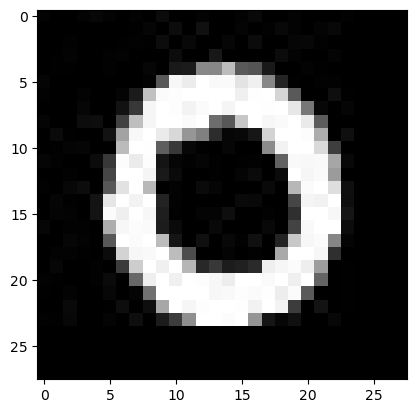

In [3]:
import matplotlib.pyplot as plt

# read the image using matplotlib
image =  plt.imread(image_path)

# show the image also using matplotlib
plt.imshow(image, cmap="gray")

Now looking at this image, most of us would know that this is a zero. This is because we've seen so many zeros in our life that the classification happens subconciously and we don't even have to actively think about it. 

After training, the Neural Network will also have the ability to recognize that this is a 0 *(hopefully)*.

In [4]:
# next, we'll quantitize our dataset to see how much training data we have

image_path_wild = os.path.join(ds_root, "**", "*.jpg") # the star '*' acts as a wildcard character. Meaning, any file that ends in .jpg will be selected

all_images = sorted(glob(image_path_wild)) # get all image paths and sort them

# show 10 first image path
print('first 10 images ---')
print(all_images[:10]) 

print('total image count')
print(len(all_images)) # the len returns the length of a list

first 10 images ---
['./dataset/trainingSet/trainingSet/0/img_1.jpg', './dataset/trainingSet/trainingSet/0/img_10007.jpg', './dataset/trainingSet/trainingSet/0/img_10010.jpg', './dataset/trainingSet/trainingSet/0/img_10017.jpg', './dataset/trainingSet/trainingSet/0/img_10032.jpg', './dataset/trainingSet/trainingSet/0/img_10039.jpg', './dataset/trainingSet/trainingSet/0/img_10043.jpg', './dataset/trainingSet/trainingSet/0/img_10059.jpg', './dataset/trainingSet/trainingSet/0/img_10074.jpg', './dataset/trainingSet/trainingSet/0/img_10082.jpg']
total image count
42000


In [5]:
# let's then see how many images each types of digits has

# in python, to use a loop, we use the `for` keyword
# the os.listdir function will list out all the top level files and folders in that directory
for folder in sorted(os.listdir(ds_root)): 
    image_in_folder_path_list = os.path.join(ds_root, folder, "*.jpg") # wildcard to select all .jpg files like before
    image_in_folder_list = glob(image_in_folder_path_list)

    print(f"The number of image for digit: {folder} is : {len(image_in_folder_list)}") # f"" is a formatted string where you can insert variables in

The number of image for digit: 0 is : 4132
The number of image for digit: 1 is : 4684
The number of image for digit: 2 is : 4177
The number of image for digit: 3 is : 4351
The number of image for digit: 4 is : 4072
The number of image for digit: 5 is : 3795
The number of image for digit: 6 is : 4137
The number of image for digit: 7 is : 4401
The number of image for digit: 8 is : 4063
The number of image for digit: 9 is : 4188


# 2. Splitting the dataset

After exploring the dataset, we now need to determine how much of it we are going to use to train the model, and how much of it we are going to use to test the model out on how its learning process is going.

The usual ratio for splitting the dataset is 80% training data and 20% testing data.

In [6]:
from sklearn.model_selection import train_test_split

# to split the images, we will gather all the image path
all_images = sorted(glob(os.path.join(ds_root, "**", "*.jpg")))

train_split, test_split = train_test_split(all_images, test_size=0.2) # this will split the dataset into 80% training data and 20% testing data

print("number of images for training:")
print(len(train_split))

print("number of images for testing:")
print(len(test_split))

number of images for training:
33600
number of images for testing:
8400


# Creating data loaders

We have successfully splitted the dataset into training data and testing data. Next, we need a way to get these images randomly at any arbitrary amount at a time so that we can feed them to the image classifier.

To do that, we will explore the `DataLoader` and `Dataset` classes from `PyTorch` and how we can define functions and classes in Python.
 
## Dataset

The purpoes of the Dataset is to return an image and its label based on any index we give it. For example if i give it index = 1, it will return the image at position 1 and its corresponding label. 

More specifically, the image has to be an array of values so that the neural network can understand and compute, and the label has to be one hot encoded for the loss function.

## Dataloader

In [7]:
from torch.utils.data import Dataset, DataLoader
import torch
import numpy as np

class MnistDataset(Dataset):
    def __init__(self, image_path): 
        """
        the init method is called when you first instantiate an instance of this class
        arguments:
        image_path: all the image path available in the dataset
        """
        self.image_path = image_path

    def __len__(self):
        """
        this function returns the length of the dataset when the len() function is invoked
        """
        return len(self.image_path)

    def __getitem__(self, index):
        """
        this function will return the image and its label according to the index argument
        argument:
        index: the order of the iamge label pair of the dataset
        """
        image_path = self.image_path[index] # the image path will have the form "./dataset/trainingSet/trainingSet/0/img_1.jpg"

        # converts this into a numpy array and normalize its values in the range [0, 1] because the max value inside any image is 255
        image_array = np.array(plt.imread(image_path))  / 255 
        image_tensor = torch.from_numpy(image_array).float()

        label = int(image_path.split("/")[-2]) # get the folder of the path

        # one_hot_label = torch.zeros(10, dtype=torch.long)
        # one_hot_label[label] = 1

        return [image_tensor, label]

In [8]:
train_dataset = MnistDataset(image_path=train_split)
test_dataset = MnistDataset(image_path=test_split)

print("train dataset length:", len(train_dataset))

image, label = train_dataset[0]

print("image array shape: ", image.shape)
print("image label: ", label)

train dataset length: 33600
image array shape:  torch.Size([28, 28])
image label:  4


In [9]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)

images, labels = next(iter(train_loader))

print("number of images in each step out of loader: ", len(images))
print("number of labels in each step out of loader: ", len(labels))

number of images in each step out of loader:  8
number of labels in each step out of loader:  8


# Model

The model architecture includes a `Flatten` layer and 5 `Linear` layers, of which 4 are normal layers and the final one is the output layer.

1. The `Flatten` layer is to flatten our image with *width* and *height* of `28px x 28px` to a flat array with size of $28 * 28 = 784$ numbers. 
2. The `Linear` layer is a matrix multiplication of the input and the output. The main idea of the linear is to transform the output into some matrix of different dimensions that the model can understand better. Many linear layers also exposes many different features of the image.
3. The output `Linear` layer has the output of shape: $10$ which is the number of digits avaiable. This layer transform the model's understanding of the image into its choices. The $10$ numbers in the model output is how confidence the model is on which digit the image is supposed to be. For example, the output of the model is: `[1, 4, 2, 8, 7, 4, 1, 1, 2, 6]`, the model is most confident that the image is the number $3$ since the score at number $3$ is $8$.

In [10]:
import torch.nn as nn

class ImageClassifer(nn.Module):
    def __init__(self, image_width=28, image_height=28, num_classes=10):
        super().__init__()

        flatten_dim = image_width * image_height

        self.flatten = nn.Flatten(start_dim=1, end_dim=-1)
        self.linear_1 = nn.Linear(in_features=flatten_dim, out_features=flatten_dim)
        self.linear_2 = nn.Linear(in_features=flatten_dim, out_features=flatten_dim)
        self.linear_3 = nn.Linear(in_features=flatten_dim, out_features=flatten_dim)
        self.linear_4 = nn.Linear(in_features=flatten_dim, out_features=flatten_dim)

        self.out = nn.Linear(in_features=flatten_dim, out_features=num_classes)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_1(x)
        x = self.linear_2(x)
        x = self.linear_3(x)
        x = self.linear_4(x)
        x = self.out(x)

        return x

In [11]:
images, labels = next(iter(train_loader))
model = ImageClassifer()

In [12]:
out = model(images)
print("output shape: ", out.shape)

output shape:  torch.Size([8, 10])


# Train the model

This is the training loop to train the model. It involves punishing the model through the `loss_fn` variable, which is the loss function. The model is then optimized based on the loss function with the `optimizer`.

In [13]:
from tqdm import tqdm

def train_one_epoch(model : ImageClassifer, loader : DataLoader, optimizer, loss_fn, device=torch.device("cuda")):
    model.train(True)

    # training loop
    running_loss = 0
    pbar = tqdm(enumerate(loader), total=len(loader), desc="Step: 0 | Train loss: 0")

    for i, (images, labels) in pbar:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        output = model(images)

        loss = loss_fn(output, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        # pbar.set_description_str(f"Step: {i} | Train loss: {loss.item()}", refresh=True)


    return running_loss / len(loader)

def test_one_epoch(model : ImageClassifer, loader : DataLoader, loss_fn, device=torch.device("cuda")):
    model.eval()

    # training loop
    running_loss = 0
    pbar = tqdm(enumerate(loader), total=len(loader), desc="Step: 0 | Test loss: 0")

    for i, (images, labels) in pbar:
        images = images.to(device)
        labels = labels.to(device)

        output = model(images)

        loss = loss_fn(output, labels)

        running_loss += loss.item()
        # pbar.set_description_str(f"Step: {i} | Test loss: {loss.item()}")

    return running_loss / len(loader)

In [14]:
# define train variables
epochs = 10

device =  torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = ImageClassifer(image_width=28, image_height=28, num_classes=10).to(device=device)

optimizer = torch.optim.AdamW(params=model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()

best_loss = 10000000

print("START TRAINING")
print("---------")

for epoch in tqdm(range(epochs)):
    train_epoch_loss = train_one_epoch(model=model, loader=train_loader, optimizer=optimizer, loss_fn=loss_fn, device=device)
    test_epoch_loss = test_one_epoch(model=model, loader=test_loader, loss_fn=loss_fn, device=device)

    if test_epoch_loss < best_loss:
        print(f"Model improved on epoch: {epoch} | Train loss: {train_epoch_loss} | Test loss: {test_epoch_loss}")
        best_loss = test_epoch_loss
    else:
        print(f"Model did not improve on epoch: {epoch} | Train loss: {train_epoch_loss} | Test loss: {test_epoch_loss}")

Step: 0 | Train loss: 0: 100%|██████████| 4200/4200 [00:13<00:00, 312.47it/s]
Step: 0 | Test loss: 0: 100%|██████████| 1050/1050 [00:01<00:00, 673.68it/s]
 10%|█         | 1/10 [00:15<02:15, 15.00s/it]

Model improved on epoch: 0 | Train loss: 0.4894833586653251 | Test loss: 0.3286713433230207


Step: 0 | Train loss: 0: 100%|██████████| 4200/4200 [00:14<00:00, 295.20it/s]
Step: 0 | Test loss: 0: 100%|██████████| 1050/1050 [00:01<00:00, 699.25it/s]
 20%|██        | 2/10 [00:30<02:03, 15.43s/it]

Model improved on epoch: 1 | Train loss: 0.30610389483604755 | Test loss: 0.3008631591343631


Step: 0 | Train loss: 0: 100%|██████████| 4200/4200 [00:14<00:00, 299.43it/s]
Step: 0 | Test loss: 0: 100%|██████████| 1050/1050 [00:01<00:00, 681.48it/s]
 30%|███       | 3/10 [00:46<01:48, 15.50s/it]

Model improved on epoch: 2 | Train loss: 0.2845332560031896 | Test loss: 0.2985700456982124


Step: 0 | Train loss: 0: 100%|██████████| 4200/4200 [00:13<00:00, 302.77it/s]
Step: 0 | Test loss: 0: 100%|██████████| 1050/1050 [00:01<00:00, 741.23it/s]
 40%|████      | 4/10 [01:01<01:32, 15.42s/it]

Model improved on epoch: 3 | Train loss: 0.27077998743436876 | Test loss: 0.2841345590672323


Step: 0 | Train loss: 0: 100%|██████████| 4200/4200 [00:13<00:00, 306.43it/s]
Step: 0 | Test loss: 0: 100%|██████████| 1050/1050 [00:01<00:00, 694.85it/s]
 50%|█████     | 5/10 [01:16<01:16, 15.35s/it]

Model improved on epoch: 4 | Train loss: 0.26315440417444774 | Test loss: 0.2792838783311613


Step: 0 | Train loss: 0: 100%|██████████| 4200/4200 [00:13<00:00, 304.02it/s]
Step: 0 | Test loss: 0: 100%|██████████| 1050/1050 [00:01<00:00, 728.15it/s]
 60%|██████    | 6/10 [01:32<01:01, 15.32s/it]

Model did not improve on epoch: 5 | Train loss: 0.25569385992507226 | Test loss: 0.2885778454531516


Step: 0 | Train loss: 0: 100%|██████████| 4200/4200 [00:13<00:00, 305.28it/s]
Step: 0 | Test loss: 0: 100%|██████████| 1050/1050 [00:01<00:00, 707.65it/s]
 70%|███████   | 7/10 [01:47<00:45, 15.29s/it]

Model did not improve on epoch: 6 | Train loss: 0.2520121196557773 | Test loss: 0.27996658817598863


Step: 0 | Train loss: 0: 100%|██████████| 4200/4200 [00:13<00:00, 321.60it/s]
Step: 0 | Test loss: 0: 100%|██████████| 1050/1050 [00:01<00:00, 721.81it/s]
 80%|████████  | 8/10 [02:01<00:30, 15.05s/it]

Model did not improve on epoch: 7 | Train loss: 0.24635892742310672 | Test loss: 0.28326138426394515


Step: 0 | Train loss: 0: 100%|██████████| 4200/4200 [00:13<00:00, 306.66it/s]
Step: 0 | Test loss: 0: 100%|██████████| 1050/1050 [00:01<00:00, 702.30it/s]
 90%|█████████ | 9/10 [02:17<00:15, 15.09s/it]

Model improved on epoch: 8 | Train loss: 0.2427122342001946 | Test loss: 0.2758943555925396


Step: 0 | Train loss: 0: 100%|██████████| 4200/4200 [00:13<00:00, 321.80it/s]
Step: 0 | Test loss: 0: 100%|██████████| 1050/1050 [00:01<00:00, 759.21it/s]
100%|██████████| 10/10 [02:31<00:00, 15.15s/it]

Model did not improve on epoch: 9 | Train loss: 0.24076792293796426 | Test loss: 0.277939048851175
